# Importar bibliotecas

In [1]:
# Importando bibliotecas
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

# Alterando Espaços de Cores
**link:** https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

Aprenda a mudar imagens entre diferentes espaços de cor. Além disso, aprenda a rastrear um objeto colorido em um vídeo

- Neste tutorial, você aprenderá como converter imagens de um espaço de cores para outro, como BGR <-> Cinza, BGR <-> VHS, etc.
- Além disso, criaremos uma aplicação para extrair um objeto colorido em um vídeo
- Você aprenderá as seguintes funções: cv.cvtColor() , cv.inRange() , etc.

In [ ]:
flags = [i for i in dir(cv) if i.startswith( 'COLOR_' )]
print( flags )                        

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

## Rastreamento de objetos a partir da cor

In [ ]:
cor = 4 # 1 = azul, 2 = vermelho, 3 = verde, 4 = branco

cap = cv.VideoCapture(0)

while(1):
    # Quado por quadro
    _, quadro = cap .read()

    # Converter BGR para HSV
    hsv = cv.cvtColor(quadro, cv.COLOR_BGR2HSV)
    
    if cor == 1:
        # Definirintervalo de azul em HSV
        azul_baixo = np.array([110,50,50])
        azul_alto = np.array([130,255,255])

        #Threshold da imagem HSV para pegar apenas azul
        mask = cv.inRange(hsv, azul_baixo, azul_alto)
    elif cor == 2:
        # Definir intervalo de vermelho em HSV
        vermelho_baixo = np.array([0,100,100])
        vermelho_alto = np.array([10,255,255])

        # Threshold da imagem HSV para pegar apenas vermelho
        mask = cv.inRange(hsv, vermelho_baixo, vermelho_alto)
    elif cor == 3:
        # Definir intervalo de verde em HSV
        verde_baixo = np.array([50,100,100])
        verde_alto = np.array([70,255,255])

        # Threshold da imagem HSV para pegar apenas verde
        mask = cv.inRange(hsv, verde_baixo, verde_alto)
    elif cor == 4:
        # Definir intervalo de branco em HSV
        branco_baixo = np.array([0, 0, 200])
        branco_alto = np.array([180, 30, 255])

        # Threshold da imagem HSV para pegar apenas branco
        mask = cv.inRange(hsv, branco_baixo, branco_alto)
    else:
        print("Cor inválida. Escolha entre 1 (azul), 2 (vermelho), 3 (verde) ou 4 (branco).")
        break

    # Máscara bitwise-AND e imagem original
    res = cv.bitwise_and(quadro,quadro, mask=mask)

    cv.imshow('quadro', quadro)
    cv.imshow('mask', mask)
    cv.imshow('res', res)
    
    # Adicionar condição para sair do loop ao pressionar 'q'
    if cv.waitKey(5) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()

## Como encontrar valores de HSV para rastrear?

In [3]:
verde = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor (verde, cv.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


# Transformações geométricas de imagens

**link:** https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

**Metas**
- Aprenda a aplicar diferentes transformações geométricas a imagens, como translação, rotação, transformação afim etc.
- Você verá estas funções: cv.getPerspectiveTransform

**Transformações**

O OpenCV fornece duas funções de transformação, cv.warpAffine e cv.warpPerspective , com as quais você pode executar todos os tipos de transformações. cv.warpAffine usa uma matriz de transformação 2x3, enquanto cv.warpPerspective usa uma matriz de transformação 3x3 como entrada.

**Escala**

O dimensionamento é apenas o redimensionamento da imagem. O OpenCV vem com uma função cv.resize() para esse propósito. O tamanho da imagem pode ser especificado manualmente, ou você pode especificar o fator de dimensionamento. Diferentes métodos de interpolação são usados. Os métodos de interpolação preferíveis são **cv.INTER_AREA** para redução e **cv.INTER_CUBIC** (lento) e **cv.INTER_LINEAR** para zoom. Por padrão, o método de interpolação **cv.INTER_LINEAR** é usado para todos os propósitos de redimensionamento. Você pode redimensionar uma imagem de entrada com qualquer um dos seguintes métodos:

In [6]:
img = cv.imread('imagens/baby_1.jpg')
assert img is not None, "Erro ao carregar a imagem"

print( img.shape )

(1600, 1200, 3)


### Resize

In [8]:
img = cv.imread('imagens/baby_1.jpg')
assert img is not None, "Erro ao carregar a imagem"

res = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)

cv.imshow('Original', img)
cv.imshow('Resultado', res)

cv.waitKey(0) & 0xFF == ord('q')

cv.destroyAllWindows()

### Translation

Você pode pegar make em um array Numpy do tipo np.float32 e passá-lo para a função **cv.warpAffine()** . Veja o exemplo abaixo para um deslocamento:

In [13]:
img = cv.imread('imagens/baby_1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Erro ao carregar a imagem"

linhas, colunas = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(colunas, linhas))

cv.imshow('Original', img)
cv.imshow('Resultado', dst)
cv.waitKey(0) & 0xFF == ord('q')
cv.destroyAllWindows()

### Rotation

Para encontrar essa matriz de transformação, o OpenCV fornece uma função, **cv.getRotationMatrix2D** . Veja o exemplo abaixo que gira a imagem em 90 graus em relação ao centro sem nenhuma escala.

In [20]:
img = cv.imread('imagens/baby_1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Erro ao carregar a imagem"
linhas, colunas = img.shape

# cols-1 e rows-1 são os limites de coordenadas.
M = cv.getRotationMatrix2D (((colunas-1)/2.0,(linhas-1)/2.0),90,1)
dst = cv.warpAffine(img, M, (colunas, linhas))

cv.imshow('Original', img)
cv.imshow('Resultado', dst)
cv.waitKey(0) & 0xFF == ord('q')
cv.destroyAllWindows()

# Image Thresholding (limiar)
**link:** https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

**Meta**

- Neste tutorial, você aprenderá sobre limiarização simples, limiarização adaptável e limiarização de Otsu.
- Você aprenderá as funções cv.threshold e cv.adaptiveThreshold .

**Simple Thresholding**

Aqui, o assunto é direto. Para cada pixel, o mesmo valor limite é aplicado. Se o valor do pixel for menor ou igual ao limite, ele é definido como 0, caso contrário, é definido como um valor máximo. A função cv.threshold é usada para aplicar o limite. O primeiro argumento é a imagem de origem, que deve ser uma imagem em tons de cinza . O segundo argumento é o valor limite que é usado para classificar os valores de pixel. O terceiro argumento é o valor máximo que é atribuído a valores de pixel que excedem o limite. O OpenCV fornece diferentes tipos de limite que são dados pelo quarto parâmetro da função. O limite básico, conforme descrito acima, é feito usando o tipo cv.THRESH_BINARY . Todos os tipos de limite simples são:

- cv.THRESH_BINÁRIO
- cv.THRESH_BINÁRIO_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

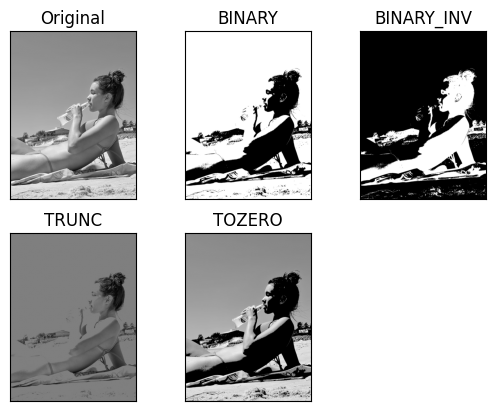

In [5]:
img= cv.imread('imagens/baby_1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Erro ao carregar a imagem"

ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
ret, thresh6 = cv.threshold(img, 127, 255, cv.THRESH_OTSU)

titulos = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV', 'OTSU']
imagens = [img, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6]

for i in range(5):
    plt.subplot(2,3,i+1), plt.imshow(imagens[i], 'gray', vmin=0,vmax=255)
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# limiar adaptavel 